<h1>Logistic Regression Model</h1>

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle
import numpy as np

In [3]:
#0, 1, 2
multi_names = ['Hate', 'Neutral', 'Offensive']

In [4]:
with open('../../hatexplain_data.pickle', 'rb') as file:
    data = pickle.load(file)

In [5]:
y_train = data["y_train"]
y_test = data["y_test"]

<h4> W2V training and testing variables</h4>

In [7]:
with open('../../saved_embeddings/w2v_embeddings.pickle', 'rb') as file:
    data = pickle.load(file)

In [8]:
X_train_w2v = data["X_train_w2v"]
X_test_w2v = data["X_test_w2v"]

<h4>Hyperparameter Fine-tuning</h4>

In [9]:
param_grid = {
    'penalty': [None, 'l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg'],
    'max_iter': [100, 1000, 10000],
    'class_weight': ['balanced', None]
}

lr_model = LogisticRegression(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(lr_model, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train_w2v[:2000], y_train[:2000])

print("Best Hyperparameters: ", grid_search.best_params_)

c:\Users\Awais\OneDrive\Desktop\Final Year Project\code\.venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Awais\OneDrive\Desktop\Final Year Project\code\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Awais\OneDrive\Desktop\Final Year Project\code\.venv\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Awais\OneDrive\Desktop\Final Year Pro

Best Hyperparameters:  {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [10]:
cv_results = grid_search.cv_results_['mean_test_score']
best_score = grid_search.best_score_

print(cv_results)
print(best_score)

[0.50647372 0.52071836        nan 0.50932836        nan 0.17994001
 0.18928236        nan 0.52671966 0.52723146 0.51351776 0.52743227
 0.510543   0.51254919        nan 0.50932836        nan 0.17994001
 0.18928236        nan 0.52671966 0.52723146 0.51351776 0.52743227
 0.510543   0.51034136        nan 0.50932836        nan 0.17994001
 0.18928236        nan 0.52671966 0.52723146 0.51351776 0.52743227
 0.51796182 0.52338981        nan 0.51496968        nan 0.18928236
 0.18928236        nan 0.4516063  0.45040922 0.42334379 0.45081851
 0.51455693 0.5132432         nan 0.51496968        nan 0.18928236
 0.18928236        nan 0.4516063  0.45040922 0.42334379 0.45081851
 0.51455693 0.51442902        nan 0.51496968        nan 0.18928236
 0.18928236        nan 0.4516063  0.45040922 0.42334379 0.45081851
 0.50647372 0.52071836        nan 0.50932836        nan 0.47841023
 0.46187782        nan 0.55235346 0.55247232 0.54322521 0.5523482
 0.510543   0.51254919        nan 0.50932836        nan 0.47841

<h1>Word2Vec Model</h1>

<h3>Variance in performance</h3> 

In [20]:
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#Using validation set to test for variance in accuracy results using k fold validation

# stratified_10_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# cross_val_scores = cross_val_score(svm_classifier, train_X, train_y, cv=stratified_10_fold, scoring='accuracy')
# accuracy_variance = np.var(cross_val_scores)

# # Print the accuracy scores for each fold
# print("Accuracy scores for each fold:", cross_val_scores)

# # Print the variance of the accuracy scores
# print("Variance in accuracy scores:", accuracy_variance)

<h3>Final Classifier</h3>

In [21]:
lr_classifier.fit(X_train_w2v, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [22]:
# Prediciting document labels for test data
y_lr_pred_w2v = lr_classifier.predict(X_test_w2v)

lr_report = classification_report(y_test, y_lr_pred_w2v, target_names=multi_names)
print("Report: \n", lr_report)

Report: 
               precision    recall  f1-score   support

        Hate       0.64      0.65      0.64      1187
     Neutral       0.60      0.75      0.67      1563
   Offensive       0.53      0.34      0.41      1096

    accuracy                           0.60      3846
   macro avg       0.59      0.58      0.57      3846
weighted avg       0.59      0.60      0.59      3846



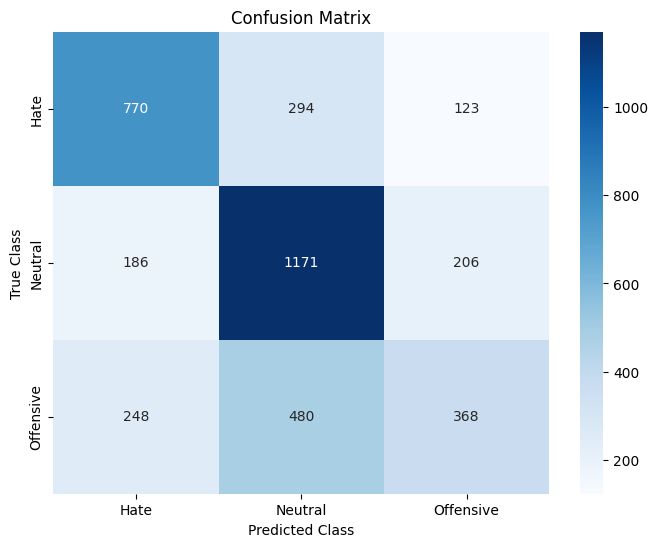

In [23]:
# Generate the confusion matrix


cm = confusion_matrix(y_test, y_lr_pred_w2v)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=multi_names, yticklabels=multi_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()